In [1]:
!pwd

/c/Users/ETHICSENSE/Desktop/aiffel/dataton/poc_lab/VoC_RM


In [2]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

print(tf.__version__)

2.6.0


In [3]:
data_dktc_path = os.path.join("./datasets/dktc/data", "train.csv")

df = pd.read_csv(data_dktc_path)

In [4]:
df['conversation']

0       지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1       길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2       너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3       어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4       저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
                              ...                        
3945    준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
3946    내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
3947    나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
3948    누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...
3949    희정씨\n네?\n주말에 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일...
Name: conversation, Length: 3950, dtype: object

In [5]:
len(df['conversation'][0])

242

In [6]:
df['conversation'][0]

'지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.'

문장의 최단 길이: 41
문장의 최장 길이: 874
문장의 평균 길이: 226


C:\Users\ETHICSENSE\anaconda3\envs\vocproject\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


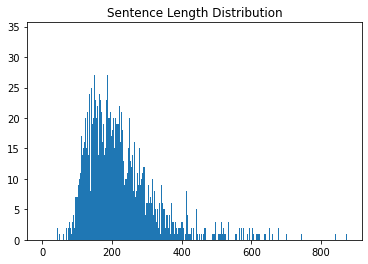

In [7]:
min_len = 99999
max_len = 0
sum_len = 0

for sen in df['conversation']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(df))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in df['conversation']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [8]:
def check_sentence_with_length(df, length):
    count = 0
    
    for sen in df:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

In [9]:
check_sentence_with_length(df['conversation'], 41)

일다했나
아니오
빨리해
네
언제할꺼야
내일까지
오늘끝내
안돼요
밤새서해
네
안녕
네?
무시해?
아뇨
이쁘네
네?
이쁘다구
아 네
오늘 시간되니?
아뇨


In [11]:
tmp = []

for sen in df['conversation']:
    tmp.append(len(sen))

set(tmp)

{41,
 45,
 50,
 57,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 71,
 72,
 74,
 75,
 76,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,


In [12]:
check_sentence_with_length(df['conversation'], 513)

아저씨! 여기 국에 칼날 들어간거 보이지? 내가 이거 먹고 큰일나면 어쩔 뻔했어?
혹시 꾸미신 일 아닙니까? 저희 가게는 세라믹 칼 써서 이 은색칼날이 들어갈리 없는데요.
내가 나 다치게 하려고 이런 일 꾸미겠나? 사과도 못 할망정 꾸민 일 이라고?
그게 아니고 합리적인 의심을 하는거죠. 저희 가게는 쇠로 된 칼 안 쓰니까. 돌려볼까요?
아니. 그. 그래 보던가! 그대신 칼 들어가 있던거면 각오하는 게 좋을거야.
여기 보이시죠. 은색 반짝 거리는거 손님이 국에 넣으신거잖아요. 사기치셨네요 맞죠?
한 번만 용서해주시게. 내가 국밥 낼 돈도 없어서 이런 짓을 했어. 그냥 조용히 나갈테니 한 번만 넘어가 주시게.
에이 그렇게는 안되죠. 제가 경찰에 신고 안 할테니까 아저씨 손가락에 있는 금반지 주세요.
이거.? 이거 결혼반지라 잃어버리면 안되는데.
그럼 지금 경찰에 신고할게요. 아내분께서 아시면 얼마나 어이 없어하실지 동네 창피하시겠네요.
아 내가. 내가. 이 결혼반지 두고 나갈게. 신고 하지 말아줘 부탁이네.


In [14]:
data_koen_path = os.path.join("./datasets/ko-en_translation", "train.csv")

df1 = pd.read_csv(data_koen_path)

In [22]:
tmp = df1[df1['class']=='일반']

tmp.head()

,idx,label,class,conversation
3950,3950,0,일반,이번 신제품 출시에 대한 시장의 반응은 어떤가요?\n판매량이 지난번 제품보다 빠르게...
3951,3951,0,일반,지난 회의 마지막에 논의했던 안건을 다시 볼까요?\n그보다는 이번 주 새로운 주제가...
3952,3952,0,일반,"이번 주 금요일까지 2천개를 더 주문하라는 건가요?\n네, 시간이 조금 촉박하기는 ..."
3953,3953,0,일반,사무용품이나 가구 중 가장 먼저 바꿔야 할 것은 뭐라고 생각하나요?\n아무래도 컴퓨...
3954,3954,0,일반,오늘이나 내일 중에 본사에 가시는 분이 있나요?\n제가 오늘 오후 5시쯤 본사에 가...


In [23]:
len(tmp)

3949

In [24]:
len(df1)

7899

문장의 최단 길이: 41
문장의 최장 길이: 874
문장의 평균 길이: 355


C:\Users\ETHICSENSE\anaconda3\envs\vocproject\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


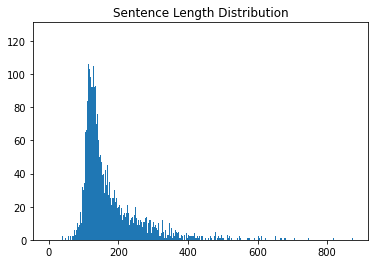

In [25]:
min_len = 99999
max_len = 0
sum_len = 0

for sen in df1['conversation']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(df))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in df1['conversation']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

문장의 최단 길이: 66
문장의 최장 길이: 236
문장의 평균 길이: 128


C:\Users\ETHICSENSE\anaconda3\envs\vocproject\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


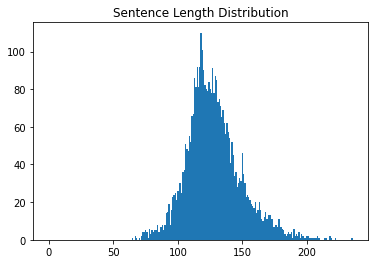

In [26]:
min_len = 99999
max_len = 0
sum_len = 0

for sen in tmp['conversation']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(df))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in tmp['conversation']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [54]:
def show_length(df1, df2, df3):
    for data in df1, df2, df3:
        min_len = 99999
        max_len = 0
        sum_len = 0
        for sen in data:
            length = len(sen)
            if min_len > length: min_len = length
            if max_len < length: max_len = length
            sum_len += length

        print("문장의 최단 길이:", min_len)
        print("문장의 최장 길이:", max_len)
        print("문장의 평균 길이:", sum_len // len(df))

        sentence_length = np.zeros((874), dtype=np.int)

        for sen in data:
            sentence_length[len(sen)-1] += 1

        plt.bar(range(874), sentence_length, width=1.0)
        plt.title("Sentence Length Distribution")
        plt.show()

문장의 최단 길이: 41
문장의 최장 길이: 874
문장의 평균 길이: 226


C:\Users\ETHICSENSE\anaconda3\envs\vocproject\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


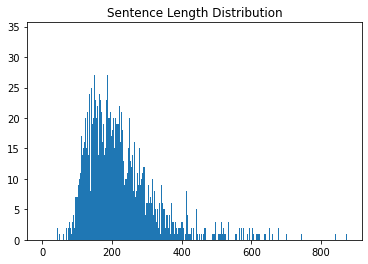

문장의 최단 길이: 41
문장의 최장 길이: 874
문장의 평균 길이: 355


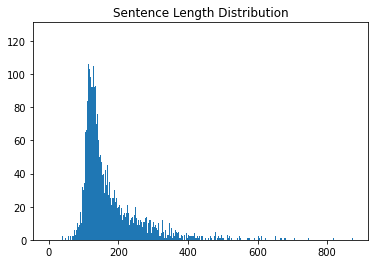

문장의 최단 길이: 66
문장의 최장 길이: 236
문장의 평균 길이: 128


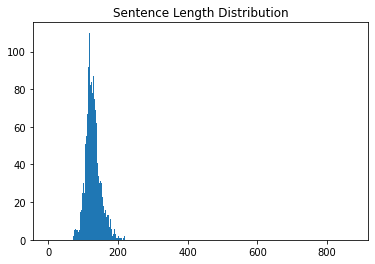

In [55]:
show_length(df['conversation'], df1['conversation'], tmp['conversation'])